In [1]:
import numpy as np
np.object = object
np.int = int
np.float = float
np.bool = bool

In [2]:
import tensorflow as tf
import pandas as pd
from sklearn import model_selection
import re

In [3]:
df = pd.read_csv(r'D:\archive_4\q_quora.csv',low_memory=False)
df.drop(df.iloc[:,6:],inplace=True,axis=1)

In [4]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [8]:
df.drop(['id','qid1','qid2'],inplace=True,axis=1)

In [9]:
df

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404346,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,What is one coin?,What's this coin?,0
404349,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [10]:
def clean_text(text): #---------- defult cleaning function to use any time ...
    text = text.lower()
    text = re.sub('\[.*?\]',' ',text)
    text = re.sub('https?://\S+|www\.\.S+',' ',text)
    text = re.sub('<.*?>+',' ',text)
    text = re.sub('\n',' ',text)
    text = re.sub('[^\w]',' ',text)
    text = re.sub('\w*\d\w*',' ',text)
    return text


def target_clean(text):
    # Remove all characters and special cases except '0' and '1'
    cleaned_text = re.sub(r'[^01]', '', text)
    return cleaned_text

df.question1 = df.question1.map(clean_text)
df.question2 = df.question2.map(clean_text)
df.is_duplicate = df.is_duplicate.map(target_clean)

In [11]:
display(df.loc[74:75])

,question1,question2,is_duplicate
74,who is the richest gambler of all time and how...,who is the richest gambler of all time and how...,1
75,if i fire a bullet backward from an aircraft g...,will the bullet be going backwards,


In [12]:
df.drop(df[df['is_duplicate'] == ''].index,inplace=True)

In [13]:
df.is_duplicate=pd.to_numeric(df.is_duplicate)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404041 entries, 0 to 404350
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   question1     404041 non-null  object
 1   question2     404041 non-null  object
 2   is_duplicate  404041 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 12.3+ MB


In [15]:
df = pd.concat([
    df[df['is_duplicate'] == 1],
df[df['is_duplicate'] == 0].iloc[:149283]
])

array([[<Axes: title={'center': 'is_duplicate'}>]], dtype=object)

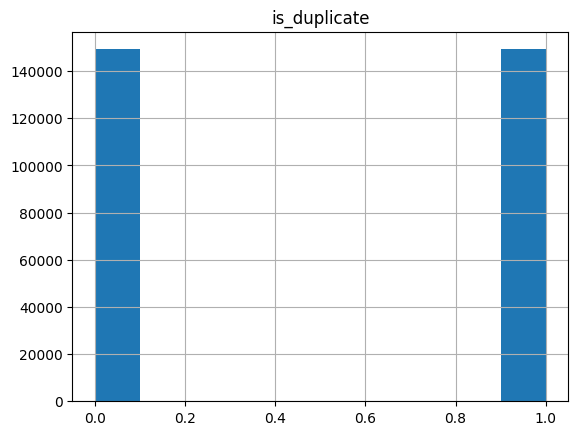

In [16]:
df.hist()

In [17]:
df[df['is_duplicate'] == 1]

,question1,question2,is_duplicate
5,astrology i am a capricorn sun cap moon and c...,i m a triple capricorn sun moon and ascendan...,1
7,how can i be a good geologist,what should i do to be a great geologist,1
11,how do i read and find my youtube comments,how can i see all my youtube comments,1
12,what can make physics easy to learn,how can you make physics easy to learn,1
13,what was your first sexual experience like,what was your first sexual experience,1
...,...,...,...
404341,what are some outfit ideas to wear to a frat p...,what are some outfit ideas wear to a frat them...,1
404342,why is manaphy childish in pokémon ranger and ...,why is manaphy annoying in pokemon ranger and ...,1
404343,how does a long distance relationship work,how are long distance relationships maintained,1
404345,what does jainism say about homosexuality,what does jainism say about gays and homosexua...,1


In [18]:
df[df['is_duplicate'] == 0]

,question1,question2,is_duplicate
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,why am i mentally very lonely how can i solve...,find the remainder when is divided by ...,0
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0
...,...,...,...
238028,how is mtnl mumbai ftth mbps internet connec...,is mbps fast internet,0
238030,can someone s civil liberties be taken away fr...,does the united kingdom have a violent crime r...,0
238031,i am planning to buy my first car not a luxur...,i am buying a car for the first time my budge...,0
238032,what is a common fantasy thing other than magi...,what are things that are only possible in a fa...,0


x=df[['question1','question2']]
y=df[['is_duplicate']]

In [19]:
train, test = model_selection.train_test_split(df, 
            test_size = 0.1, random_state=42, stratify=df.is_duplicate) 

train.shape, test.shape

((268709, 3), (29857, 3))

In [20]:
voc_size=10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=voc_size,
filters='!"#$%&()*+,-./:;=?@[\]^_`{|}~\t\n', oov_token='')
tokenizer.fit_on_texts(df.question1)

In [21]:
def tokenize(tokenizer,text):
    tensor = tokenizer.texts_to_sequences(text)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post',maxlen=200,truncating='post')
    return tensor

In [22]:
train_question1_tensor = tokenize(tokenizer,train.question1)
train_question2_tensor = tokenize(tokenizer,train.question2)

y_train = train.is_duplicate

test_question1_tensor = tokenize(tokenizer,test.question1)
test_question2_tensor = tokenize(tokenizer,test.question2)

y_test = test.is_duplicate

In [23]:
def create_dataset(x1,x2, y):
    
    data = tf.data.Dataset.from_tensor_slices(((x1,x2), y))

    data = data.shuffle(1028)
    data = data.batch(32, drop_remainder=True)

    data = data.prefetch(tf.data.experimental.AUTOTUNE)

    return data

train_dataset = create_dataset(train_question1_tensor,train_question2_tensor, y_train)
test_dataset = create_dataset(test_question1_tensor,test_question2_tensor, y_test)

In [24]:
class SiameseModel(tf.keras.Model):
  def __init__(self):
      super(SiameseModel, self).__init__()

      self.em = tf.keras.layers.Embedding(input_dim=voc_size+1, output_dim=128, input_length=200, mask_zero=True)
      self.gru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=64, return_sequences=False, return_state=True))
      self.d1 = tf.keras.layers.Dense(256, activation='leaky_relu', kernel_initializer=tf.initializers.he_uniform())
      self.dropout = tf.keras.layers.Dropout(0.3)
      self.out = tf.keras.layers.Dense(units=1, activation=tf.nn.sigmoid)

  def call(self, inputs):
    x1 = inputs[0]
    x2 = inputs[1]
    x1 = self.em(x1)
    x2 = self.em(x2)
    x1, hidden_1, hidden_2 = self.gru(x1)
    x2, _, _ = self.gru(x2, [hidden_1, hidden_2])
    x = tf.keras.layers.concatenate([x1, x2])
    x = self.d1(x)
    x = self.dropout(x)
    output = self.out(x)
    return output

  def build_model(self):
    x = tf.keras.layers.Input(shape=(300,))
    return tf.keras.Model(inputs=x, outputs=self.call((x,x)))


model = SiameseModel()
model.build_model().summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 128)     1280128     input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, 128), (None, 74496       embedding[0][0]                  
                                                                 embedding[1][0]                  
                                                                 bidirectional[0][1]          

In [25]:
tf.keras.utils.plot_model(model.build_model())

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [26]:
model.compile('adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])
model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
8397/8397 [==============================] - 230s 25ms/step - loss: 0.4996 - acc: 0.7544 - val_loss: 0.4490 - val_acc: 0.7897
Epoch 2/5
8397/8397 [==============================] - 197s 23ms/step - loss: 0.3937 - acc: 0.8219 - val_loss: 0.4442 - val_acc: 0.7960
Epoch 3/5
8397/8397 [==============================] - 199s 24ms/step - loss: 0.3152 - acc: 0.8655 - val_loss: 0.4867 - val_acc: 0.7989
Epoch 4/5
8397/8397 [==============================] - 198s 24ms/step - loss: 0.2502 - acc: 0.8972 - val_loss: 0.5632 - val_acc: 0.7938
Epoch 5/5
8397/8397 [==============================] - 200s 24ms/step - loss: 0.1993 - acc: 0.9210 - val_loss: 0.6415 - val_acc: 0.7892


In [ ]:
# make predictions on the test data
pred=model((test_question1_tensor,test_question2_tensor))
pred_list=[]
# convert the predictions to binary 
for i in pred.numpy():
    if i>0.7:
        pred_list.append(1)
    else :
        pred_list.append(0)

pred_list
# pred_array=np.array(pred_list)